In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

In [161]:
compas = pd.read_csv("Compas.csv")

compas

,Unnamed: 0,id,first,last,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,v_decile_score,v_score_text,decile_score.1,score_text
0,0,1,miguel,hernandez,Male,69,Greater than 45,Other,0,1,0,0,0,0,0,1,Low,1,Low
1,1,2,michael,ryan,Male,31,25 - 45,Caucasian,0,5,0,0,0,-1,0,2,Low,5,Medium
2,2,3,kevon,dixon,Male,34,25 - 45,African-American,0,3,0,0,0,1,1,1,Low,3,Low
3,3,4,ed,philo,Male,24,Less than 25,African-American,0,4,0,1,4,1,0,3,Low,4,Low
4,4,5,marcu,brown,Male,23,Less than 25,African-American,0,8,1,0,1,0,0,6,Medium,8,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,11752,11753,patrick,hamilton,Male,47,Greater than 45,Other,0,3,0,0,1,0,0,1,Low,3,Low
11753,11753,11754,raymond,hernandez,Male,22,Less than 25,Caucasian,0,7,3,5,3,1,0,5,Medium,7,Medium
11754,11754,11755,dieuseul,pierre-gilles,Male,35,25 - 45,Other,0,4,0,0,0,0,0,3,Low,4,Low
11755,11755,11756,scott,lomagistro,Male,29,25 - 45,Caucasian,0,3,0,0,2,0,0,2,Low,3,Low


In [162]:
compasblackpredict = compas[(compas.race == "African-American")&(compas.sex == "Male")]

compasblackpredict = compasblackpredict[["is_recid", "decile_score"]]

compasblackpredict = compasblackpredict[(compasblackpredict.is_recid != -1)]
compasblackpredict

,is_recid,decile_score
2,1,3
3,1,4
4,0,8
14,1,6
17,0,4
...,...,...
11737,1,9
11744,0,4
11746,1,4
11749,0,1


In [163]:
Bllikely = (compasblackpredict[compasblackpredict.decile_score > 5]).decile_score.count()
Bllikely

2268

In [164]:
recid = compasblackpredict.is_recid.sum()
recid

1883

In [165]:
Bllikely/recid. 

1.204460966542751

In [158]:
compaswhitepredict = compas[(compas.race == "Caucasian") &(compas.sex == "Male")]

compaswhitepredict = compaswhitepredict[["is_recid","score_text_High","decile_score"]]

compaswhitepredict = compaswhitepredict[(compaswhitepredict.is_recid != -1)]
compaswhitepredict.head()

,is_recid,score_text_High,decile_score
7,1,0,6
10,0,1,10
12,1,0,3
13,0,0,4
16,0,0,3


In [156]:
Whlikely = (compaswhitepredict[compaswhitepredict.decile_score > 5]).decile_score.count()
Whlikely

665

In [157]:
Whrecid = compaswhitepredict.is_recid.sum()
Whrecid

867

In [169]:
Whlikely/Whrecid

0.7670126874279123

In [191]:
colors = [ "#000005","#C0C0C0" ]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))

fig = sns.barplot(data = Compare,x = "# With Score > 5, y= "# With Score > 5", palette=customPalette)
fig.set(xlabel='Race', ylabel='Accuracy', Title = " Decile Score Accuracies By Race")

ValueError: Could not interpret input '# With Score > 5'

In [197]:
#Creaing dataframe to easily graph
Baggresults = pd.DataFrame({"Race": ["Black Men", "White Men", "Black Men", "White Men"],
                   'Data': [recid, Whrecid, Bllikely, Whlikely],
                   "Type": ["# of recidivisms","# of recidivisms","# With Score > 5","# With Score > 5"] })
Baggresults

,Race,Data,Type
0,Black Men,1883,# of recidivisms
1,White Men,867,# of recidivisms
2,Black Men,2268,# With Score > 5
3,White Men,665,# With Score > 5


[Text(0, 0.5, '# of Convicts'),
 Text(0.5, 0, 'Race'),
 Text(0.5, 1.0, 'Predicted Redivisms vs. Actual')]

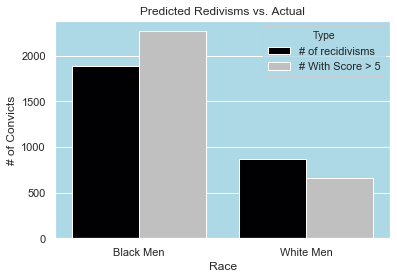

In [210]:
colors = [ "#000005","#C0C0C0" ]
sns.set(rc={'axes.facecolor':'#ADD8E6'})
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))

fig = sns.barplot(data = Baggresults,x = "Race", y= "Data", hue = "Type", palette=customPalette)
fig.set(xlabel='Race', ylabel='# of Convicts', Title = "Predicted Redivisms vs. Actual")

In [206]:
Baggresults.groupby(["Race", "Type"]).mean()

Data
Race      Type                  
Black Men # With Score > 5  2268
          # of recidivisms  1883
White Men # With Score > 5   665
          # of recidivisms   867